In [1]:
import os
os.environ['SCRATCH']='/global/cscratch1/sd/bos0109'
SCRATCH = %env SCRATCH

In [2]:
import numpy as np
import pandas as pd
from astropy.stats import sigma_clipped_stats 

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
reals = pd.read_csv(f'{SCRATCH}/results/reals_table.csv')
bogus = pd.read_csv(f'{SCRATCH}/results/bogus_table.csv')
matched_lcs = pd.read_csv(f'{SCRATCH}/results/matched_lcs_visit_by_visit.csv')

In [5]:
len(bogus)

634976

In [6]:
len(reals)

1432

In [7]:
flags = [acol for acol in reals.columns if 'flag' in acol]

In [8]:
bogus[flags].describe()

,flags_negative,base_NaiveCentroid_flag,base_NaiveCentroid_flag_noCounts,base_NaiveCentroid_flag_edge,base_NaiveCentroid_flag_resetToPeak,base_PeakCentroid_flag,base_SdssCentroid_flag,base_SdssCentroid_flag_edge,base_SdssCentroid_flag_noSecondDerivative,base_SdssCentroid_flag_almostNoSecondDerivative,...,ip_diffim_PsfDipoleFlux_pos_flag,ip_diffim_PsfDipoleFlux_neg_flag,ip_diffim_ClassificationDipole_flag,ip_diffim_DipoleFit_flag_classification,ip_diffim_DipoleFit_flag_classificationAttempted,ip_diffim_DipoleFit_flag,ip_diffim_DipoleFit_flag_edge,ip_diffim_forced_PsfFlux_flag,ip_diffim_forced_PsfFlux_flag_noGoodPixels,ip_diffim_forced_PsfFlux_flag_edge
count,634976,634976,634976,634976,634976,634976,634976,634976,634976,634976,...,634976,634976,634976,634976,634976,634976,634976,634976,634976,634976
unique,1,2,1,2,2,1,2,2,1,2,...,1,1,2,2,2,2,2,2,2,2
top,False,False,False,False,False,False,True,False,False,False,...,False,False,False,False,False,True,False,False,False,False
freq,634976,627181,634976,634974,627183,634976,345995,627345,634976,622194,...,634976,634976,634975,469159,469043,469043,634280,630703,634974,630703


In [9]:
def binary_plot_hist(reals, bogus, column, axis, logy=False, logx=False, absolute=False, **kwargs): 
    
    if absolute:
        axis.hist(np.abs(reals[column].astype(float)), align='left', color='black', label='Real', log=logy, **kwargs)
        axis.hist(np.abs(bogus[column].astype(float)), color='red', label='Bogus', align='right', log=logy, **kwargs)
    else:
        axis.hist(reals[column],#.astype(float), 
                  align='left', color='black', label='Real', log=logy, **kwargs)
        axis.hist(bogus[column],#.astype(float), 
                  color='red', label='Bogus', align='right', log=logy, **kwargs)

    axis.set_xlabel(column)
    axis.set_ylabel('N')
    if logx: 
        axis.set_xscale('log')
    return axis

In [10]:
cols = flags

In [11]:
len(cols)

103

/global/homes/b/bos0109/.local/lib/python3.7/site-packages/numpy/lib/histograms.py:778: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
  a, weights = _ravel_and_check_weights(a, weights)


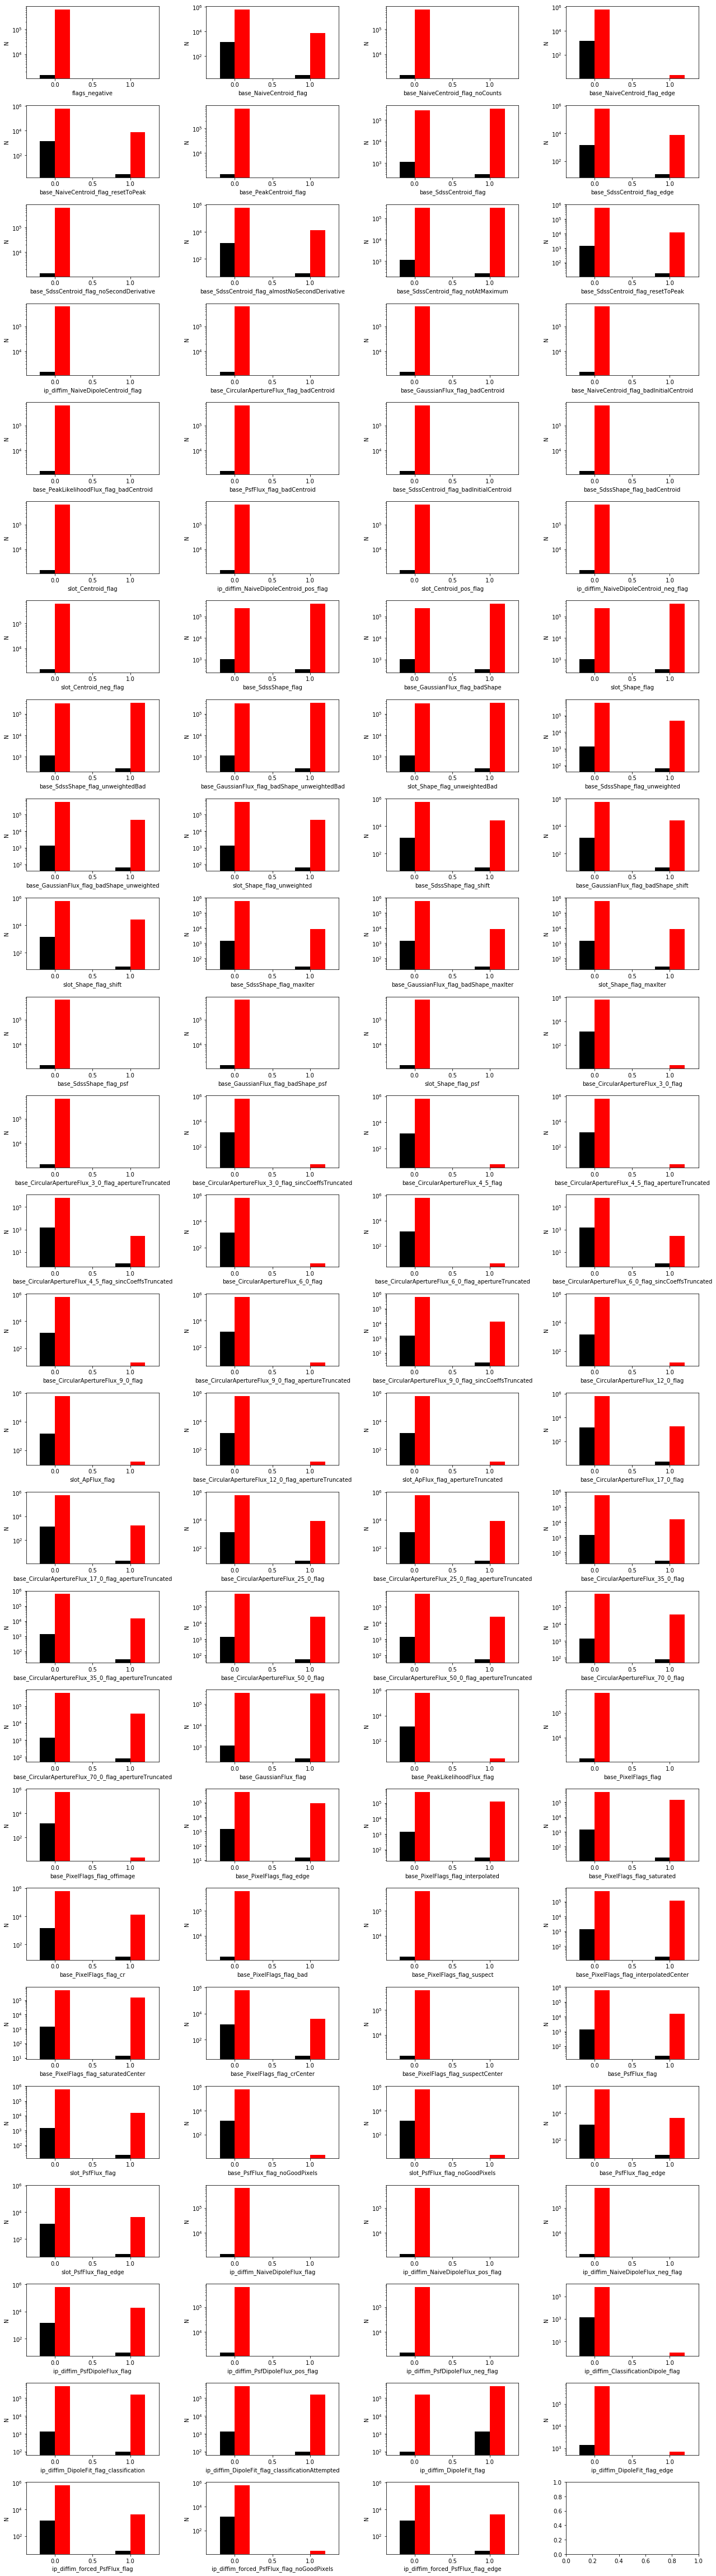

In [12]:
fig, axis = plt.subplots(ncols=4, nrows=26, figsize=(18, 64))
bins=[-0.1, 0.1, 0.9, 1.1]
for acol, ax in zip(cols, axis.flatten()):
    binary_plot_hist(reals, bogus, acol, ax, logy=True, logx=False, density=False, histtype='bar', bins=bins)
    #ax.legend(loc='best')
plt.tight_layout()

Many of the flags have always the same value. A large group presents no actual correlation with the actual class of the object.

In case of Dipole or Shape related flags we have instead, some (at least _weak_) correlation with the class.

In [13]:
instFluxCols = [acol for acol in reals.columns if 'instFlux' in acol and 'Cov' not in acol and 'Err' not in acol]

In [14]:
cols = instFluxCols[:]
print(len(cols))

49


For the case of fluxes, we will inspect what is happening. They are trickier since they may contain non valid values

/usr/common/software/python/3.7-anaconda-2019.10/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in log10
  This is separate from the ipykernel package so we can avoid doing imports until
/global/homes/b/bos0109/.local/lib/python3.7/site-packages/numpy/lib/histograms.py:421: RuntimeWarning: invalid value encountered in greater
  if np.any(bin_edges[:-1] > bin_edges[1:]):


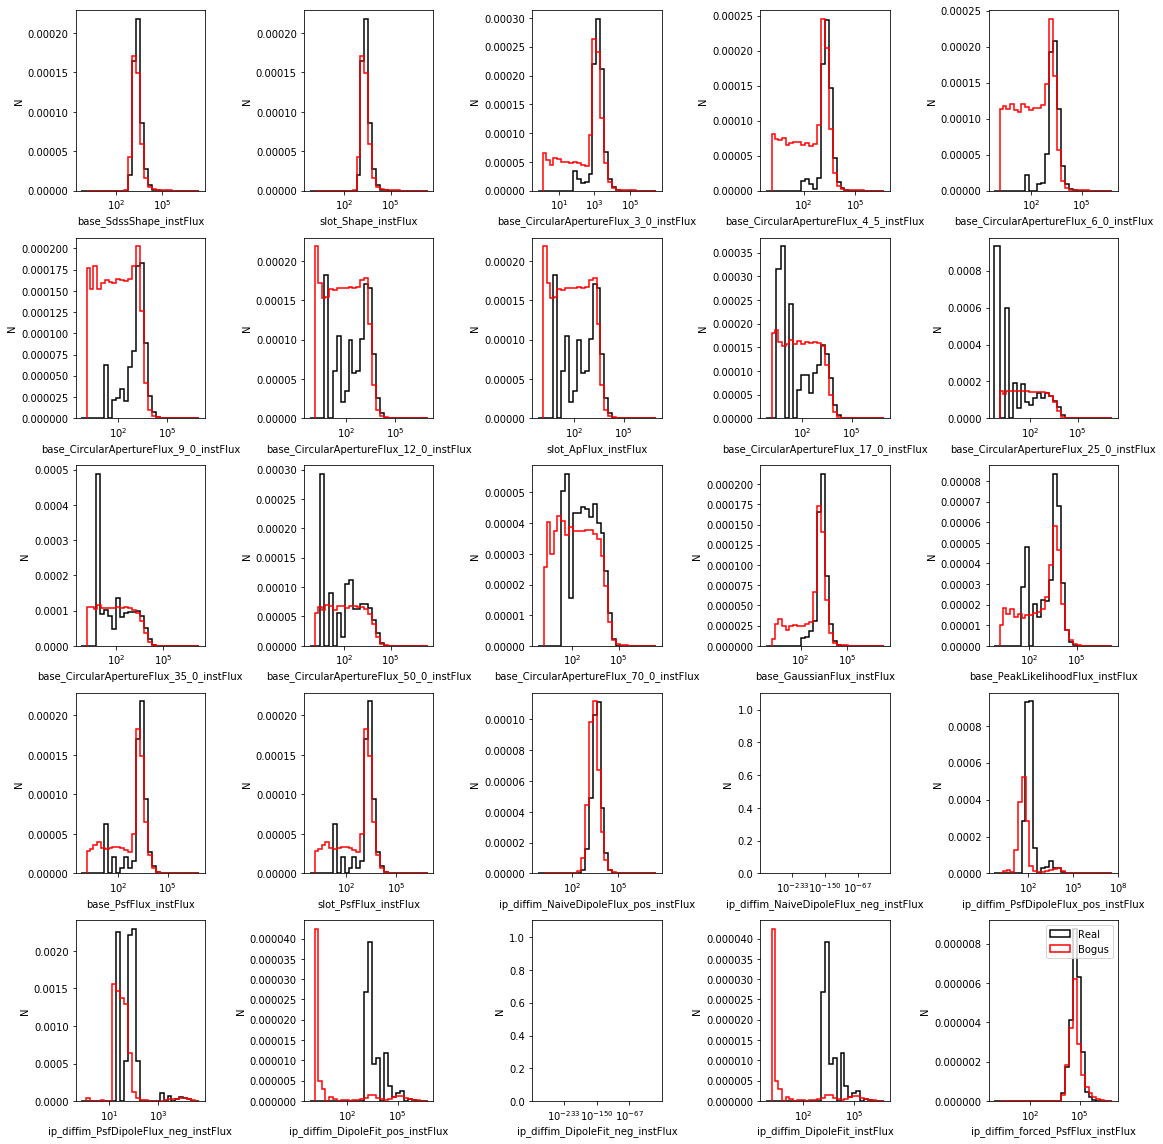

In [15]:
fig, axis = plt.subplots(ncols=5, nrows=5, figsize=(16, 16))
for acol, ax in zip(cols, axis.flatten()):
    bins=np.logspace(0, np.log10(np.max([np.max(reals[acol]), np.max(bogus[acol])])), num=30)
    binary_plot_hist(reals, bogus, acol, ax, logy=False, bins=bins, absolute=True,
                     logx=True, density=True, histtype='step', lw=1.5)
ax.legend(loc='best')
plt.tight_layout()

In [16]:
cols = [acol for acol in reals.columns if '_SN' in acol]

In [17]:
len(cols)

24

/usr/common/software/python/3.7-anaconda-2019.10/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in log10
  after removing the cwd from sys.path.
/usr/common/software/python/3.7-anaconda-2019.10/lib/python3.7/site-packages/matplotlib/axes/_axes.py:6735: RuntimeWarning: All-NaN slice encountered
  xmin = min(xmin, np.nanmin(xi))
/usr/common/software/python/3.7-anaconda-2019.10/lib/python3.7/site-packages/matplotlib/axes/_axes.py:6736: RuntimeWarning: All-NaN slice encountered
  xmax = max(xmax, np.nanmax(xi))
/global/homes/b/bos0109/.local/lib/python3.7/site-packages/numpy/core/function_base.py:159: RuntimeWarning: invalid value encountered in multiply
  y *= step
/usr/common/software/python/3.7-anaconda-2019.10/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in log10
  after removing the cwd from sys.path.
/usr/common/software/python/3.7-anaconda-2019.10/lib/python3.7/site-packages/ipykernel_

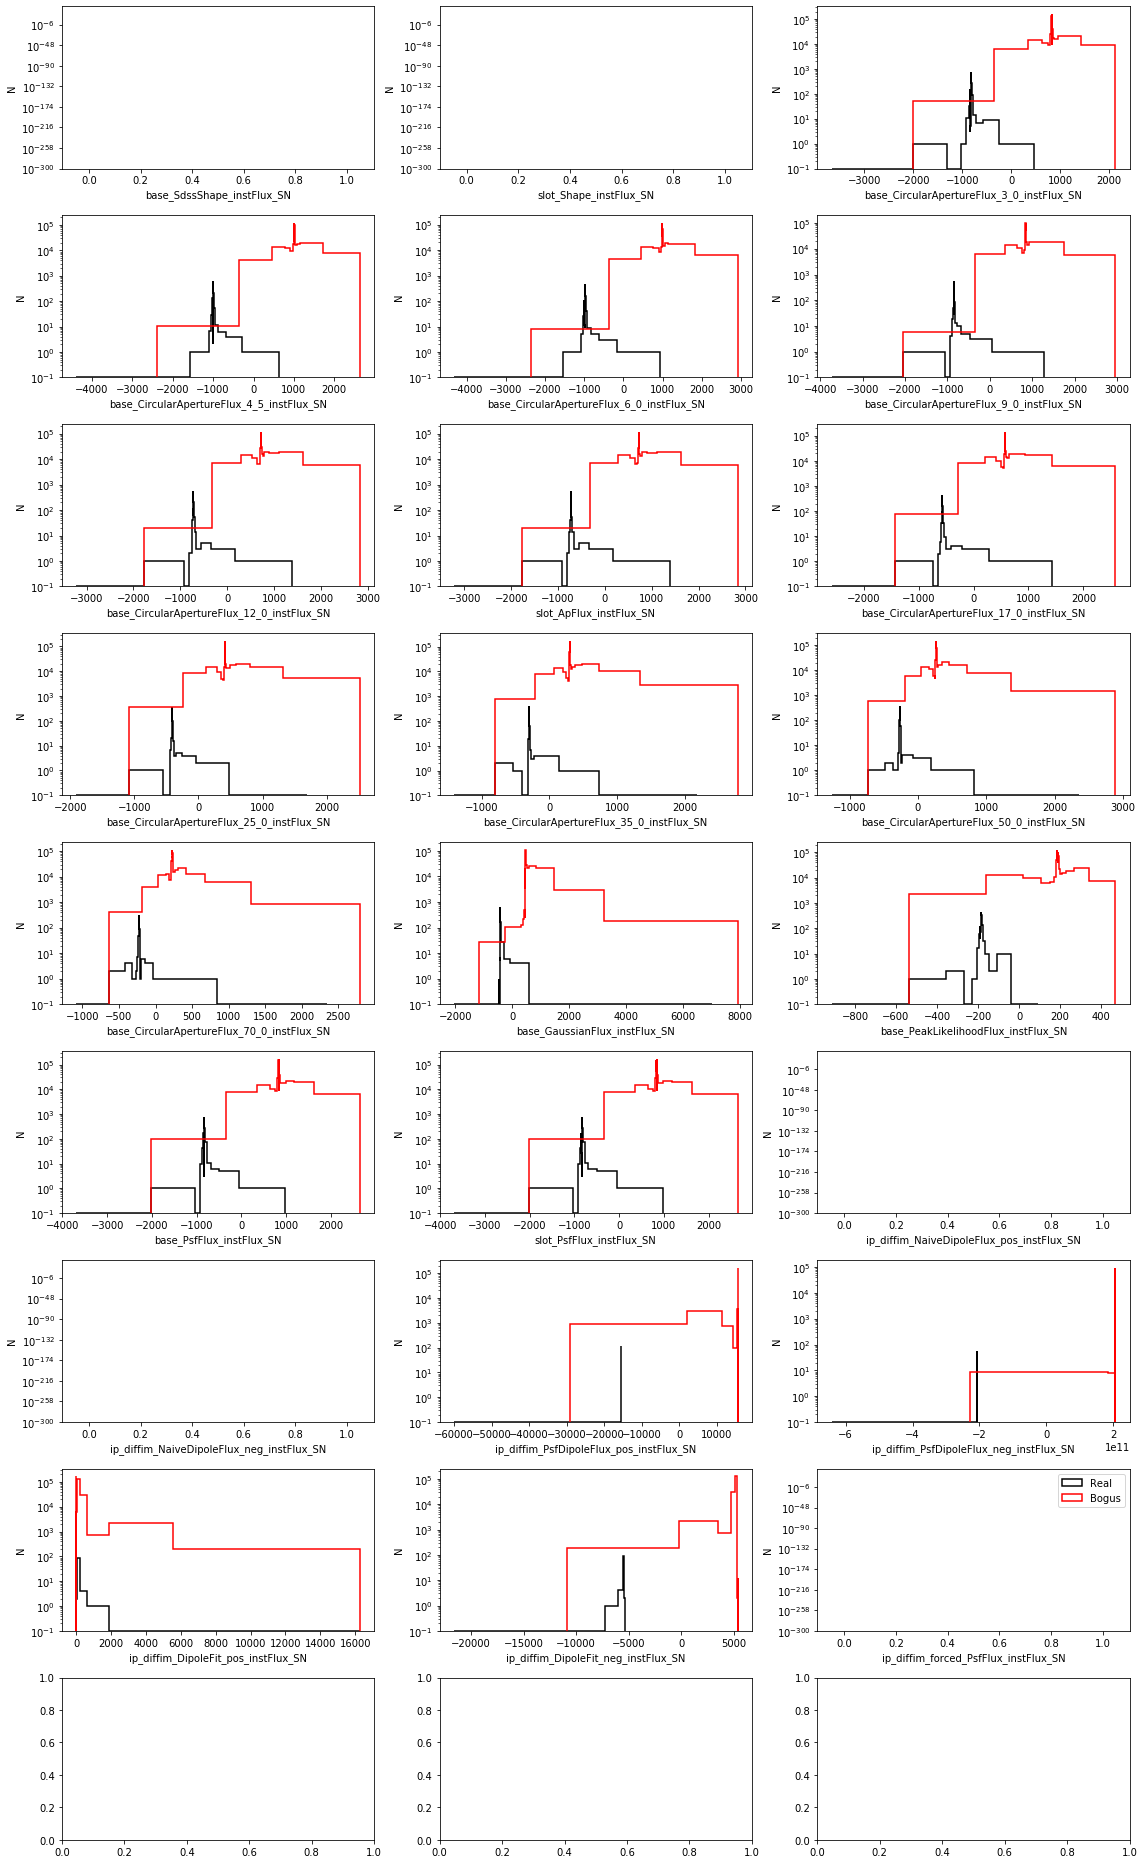

In [18]:
fig, axis = plt.subplots(ncols=3, nrows=9, figsize=(16, 26))
for acol, ax in zip(cols, axis.flatten()):
    
    bins = list(-1*np.logspace(0, np.log10(-1*np.min([np.min(reals[acol]), np.min(bogus[acol])])), num=10))
    bins.reverse()
    bins = bins + list(np.logspace(0, np.log10(np.max([np.max(reals[acol]), np.max(bogus[acol])])), num=10))
    
    binary_plot_hist(reals, bogus, acol, ax, logy=True, absolute=False, bins=bins,
                     logx=False, density=False, histtype='step', lw=1.5)
    
    #ax.set_xscale('symlog')
ax.legend(loc='best')
plt.tight_layout()

In [19]:
cols = [acol for acol in reals.columns if 'Dipole' in acol 
        and 'flag' not in acol 
        and 'Cov' not in acol 
        and 'Err' not in acol
        and 'Classification' not in acol]

In [20]:
len(cols)

38

/usr/common/software/python/3.7-anaconda-2019.10/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in log10
  This is separate from the ipykernel package so we can avoid doing imports until


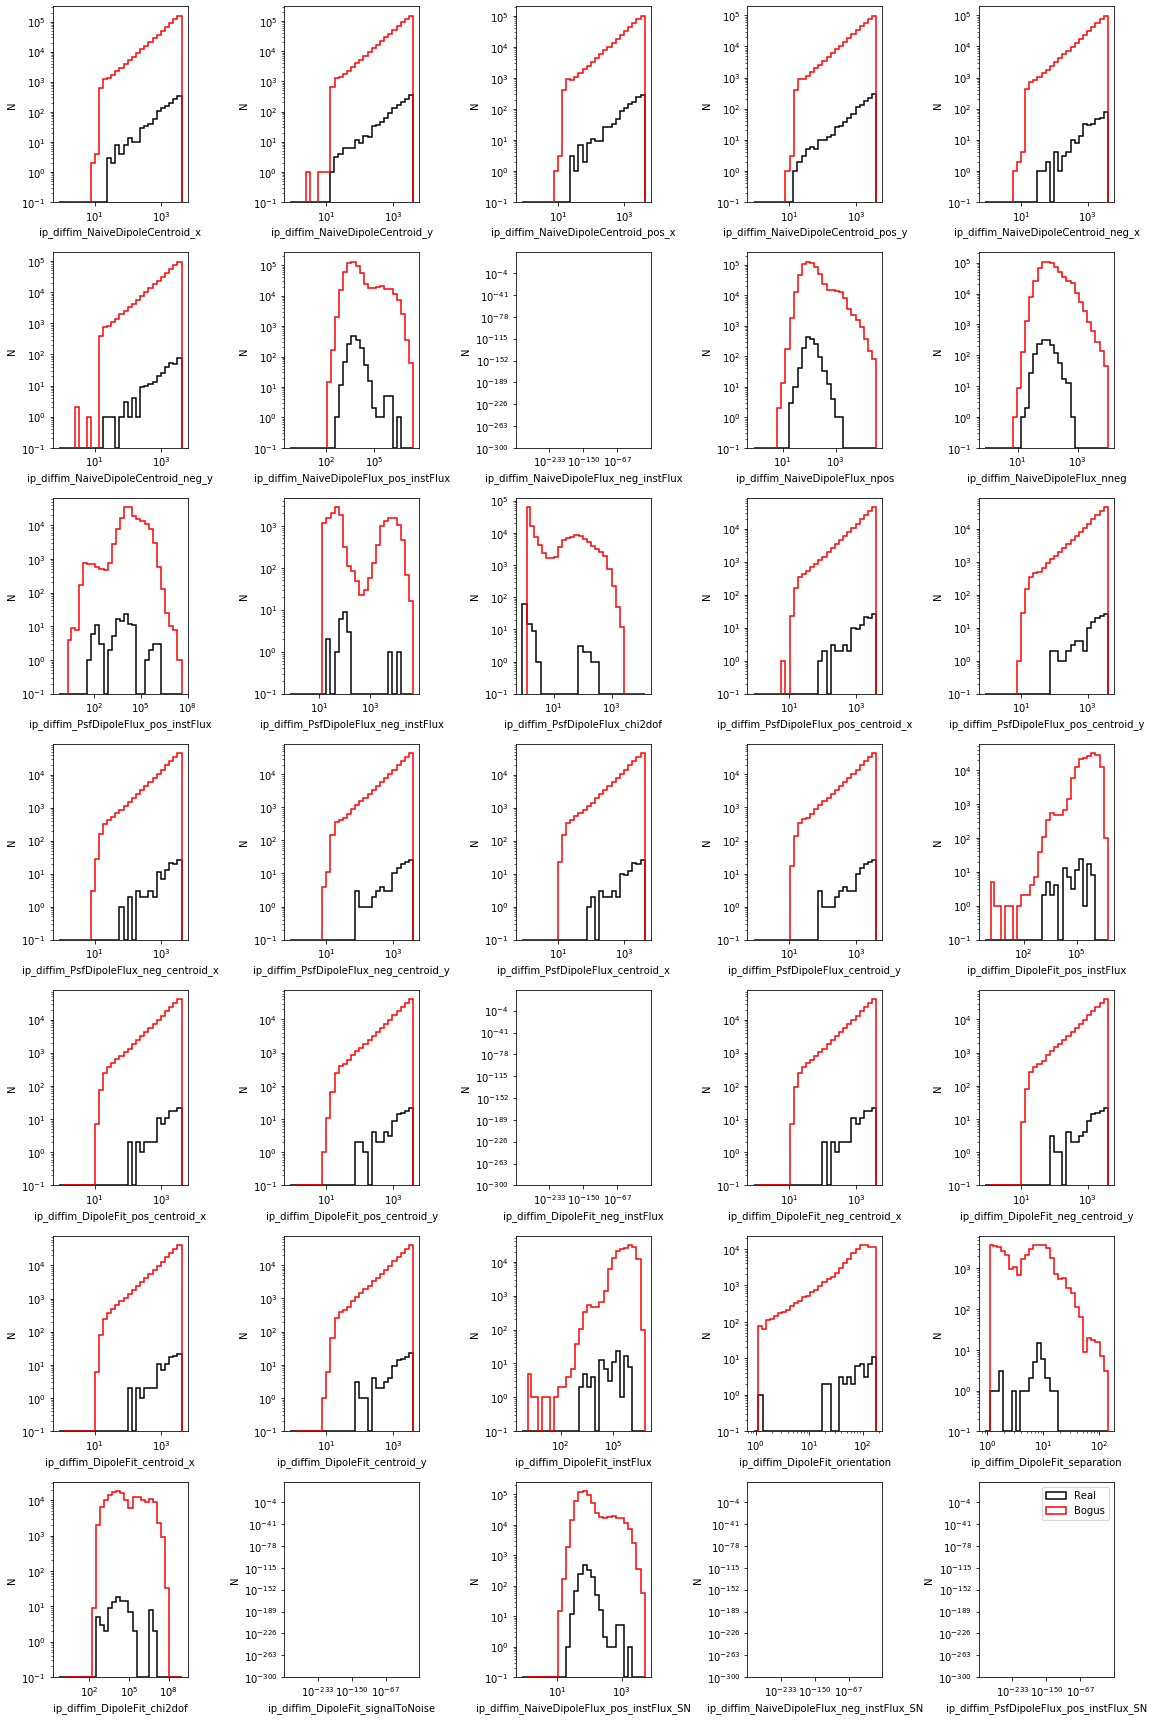

In [21]:
fig, axis = plt.subplots(ncols=5, nrows=7, figsize=(16, 24))
for acol, ax in zip(cols, axis.flatten()):
    bins=np.logspace(0, np.log10(np.max([np.max(reals[acol]), np.max(bogus[acol])])), num=30)
    binary_plot_hist(reals, bogus, acol, ax, logy=True, bins=bins,
                     logx=True, density=False, histtype='step', lw=1.5)
ax.legend(loc='best')
plt.tight_layout()

In [22]:
cols = [acol for acol in reals.columns if 'Classification' in acol]

In [23]:
len(cols)

2

/global/homes/b/bos0109/.local/lib/python3.7/site-packages/numpy/lib/histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/global/homes/b/bos0109/.local/lib/python3.7/site-packages/numpy/lib/histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


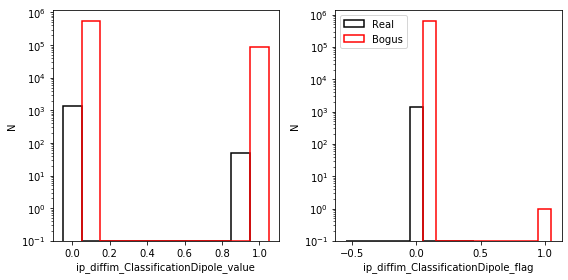

In [24]:
fig, axis = plt.subplots(ncols=2, nrows=1, figsize=(8,4))
for acol, ax in zip(cols, axis.flatten()):
    #bins=np.logspace(0, np.log10(np.max([np.max(reals[acol]), np.max(bogus[acol])])), num=30)
    binary_plot_hist(reals, bogus, acol, ax, logy=True, absolute=True, #bins=bins,
                     logx=False, density=False, histtype='step', lw=1.5)
ax.legend(loc='best')
plt.tight_layout()

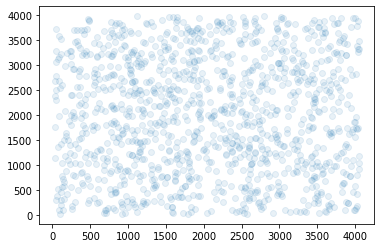

In [25]:
plt.scatter(reals.ip_diffim_NaiveDipoleCentroid_pos_x, reals.ip_diffim_NaiveDipoleCentroid_pos_y, alpha=0.1)

In [26]:
[acol for acol in reals.columns if 'pos_x' in acol or 'pos_y' in acol]

['ip_diffim_NaiveDipoleCentroid_pos_x',
 'slot_Centroid_pos_x',
 'ip_diffim_NaiveDipoleCentroid_pos_y',
 'slot_Centroid_pos_y',
 'ip_diffim_NaiveDipoleCentroid_pos_xErr',
 'slot_Centroid_pos_xErr',
 'ip_diffim_NaiveDipoleCentroid_pos_yErr',
 'slot_Centroid_pos_yErr']

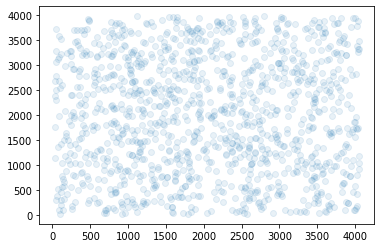

In [27]:
plt.scatter(reals.slot_Centroid_pos_x, reals.slot_Centroid_pos_y, alpha=0.1)

In [28]:
[acol for acol in reals.columns if 'coord' in acol]

['coord_ra', 'coord_dec']

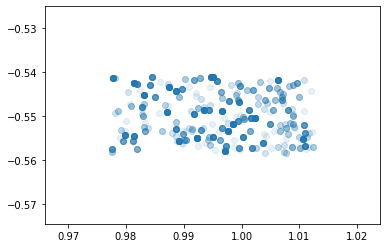

In [29]:
plt.scatter(reals.coord_ra, reals.coord_dec, alpha=0.1)

In [30]:
cols = ['flags_negative','base_NaiveCentroid_flag_edge', 'base_NaiveCentroid_flag_resetToPeak', 'base_SdssShape_flag','base_SdssShape_flag_unweightedBad',
        'base_PixelFlags_flag_interpolated',  'base_PixelFlags_flag_saturated', 'base_PixelFlags_flag_cr', 'base_PixelFlags_flag_bad', 'base_PixelFlags_flag_suspect',
        'base_PixelFlags_flag_interpolatedCenter', 'base_PixelFlags_flag_saturatedCenter', 'base_PixelFlags_flag_crCenter', 'base_PixelFlags_flag_suspectCenter']

In [31]:
len(cols)

14

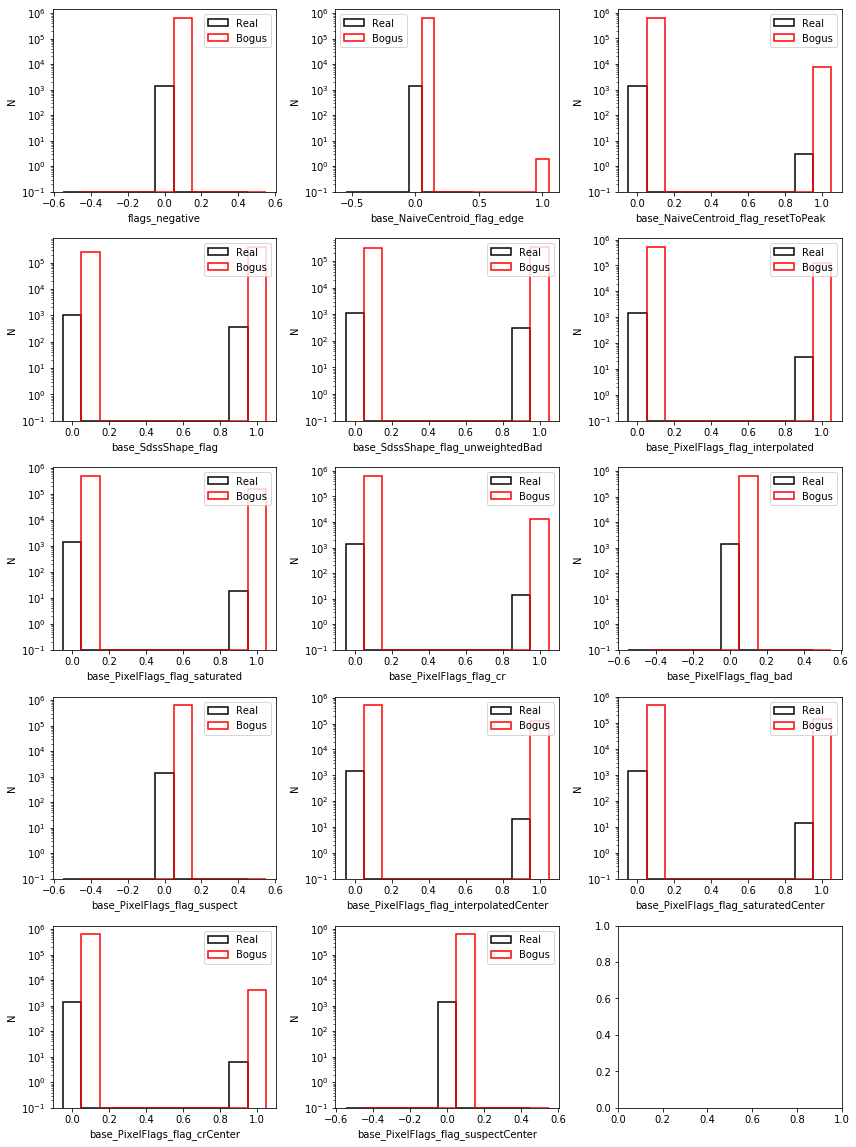

In [32]:
fig, axis = plt.subplots(ncols=3, nrows=5, figsize=(12,16))
for acol, ax in zip(cols, axis.flatten()):
    #bins=np.logspace(0, np.log10(np.max([np.max(reals[acol]), np.max(bogus[acol])])), num=30)
    binary_plot_hist(reals, bogus, acol, ax, logy=True, absolute=True, #bins=bins,
                     logx=False, density=False, histtype='step', lw=1.5)
    ax.set_xlabel(acol)
    ax.legend(loc='best')
plt.tight_layout()

-------

### Store both tables

In [33]:
reals.to_csv(f'{SCRATCH}/results/reals_table_post.csv')

In [34]:
bogus.to_csv(f'{SCRATCH}/results/bogus_table_post.csv')

---------
### Single Flux measurement

In [35]:
instFluxCols = [acol for acol in reals.columns if 'instFlux' in acol and 'Cov' not in acol and 'Err' not in acol]

In [36]:
instFluxCols

['base_SdssShape_instFlux',
 'slot_Shape_instFlux',
 'base_CircularApertureFlux_3_0_instFlux',
 'base_CircularApertureFlux_4_5_instFlux',
 'base_CircularApertureFlux_6_0_instFlux',
 'base_CircularApertureFlux_9_0_instFlux',
 'base_CircularApertureFlux_12_0_instFlux',
 'slot_ApFlux_instFlux',
 'base_CircularApertureFlux_17_0_instFlux',
 'base_CircularApertureFlux_25_0_instFlux',
 'base_CircularApertureFlux_35_0_instFlux',
 'base_CircularApertureFlux_50_0_instFlux',
 'base_CircularApertureFlux_70_0_instFlux',
 'base_GaussianFlux_instFlux',
 'base_PeakLikelihoodFlux_instFlux',
 'base_PsfFlux_instFlux',
 'slot_PsfFlux_instFlux',
 'ip_diffim_NaiveDipoleFlux_pos_instFlux',
 'ip_diffim_NaiveDipoleFlux_neg_instFlux',
 'ip_diffim_PsfDipoleFlux_pos_instFlux',
 'ip_diffim_PsfDipoleFlux_neg_instFlux',
 'ip_diffim_DipoleFit_pos_instFlux',
 'ip_diffim_DipoleFit_neg_instFlux',
 'ip_diffim_DipoleFit_instFlux',
 'ip_diffim_forced_PsfFlux_instFlux',
 'base_SdssShape_instFlux_SN',
 'slot_Shape_instFlux_S

(array([3.00000e+00, 2.00000e+00, 1.30000e+01, 3.56000e+02, 6.14700e+03,
        3.04570e+04, 5.61697e+05, 1.56480e+04, 4.21700e+03, 6.63000e+02]),
 array([-2858.38553849, -2391.32211743, -1924.25869637, -1457.19527531,
         -990.13185425,  -523.06843319,   -56.00501213,   411.05840893,
          878.12182999,  1345.18525105,  1812.24867211]),
 <a list of 1 Patch objects>)

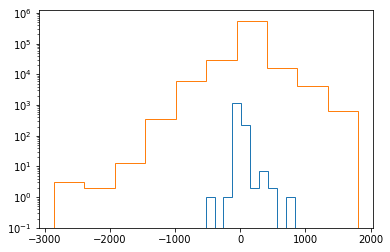

In [37]:
#bins = np.logspace(0, 4, num=15)
plt.hist(reals.base_PsfFlux_instFlux_SN, histtype='step', log=True)#, bins=bins)
plt.hist(bogus.base_PsfFlux_instFlux_SN, histtype='step', log=True)#, bins=bins)
#plt.gca().set_xscale('log')

(array([2.80000e+01, 2.80914e+05, 3.88080e+04, 2.04500e+03, 1.21000e+02,
        8.80000e+01, 4.30000e+01, 1.40000e+01, 4.00000e+00, 6.00000e+00]),
 array([-1607.20709019,  -700.14163744,   206.92381532,  1113.98926807,
         2021.05472082,  2928.12017357,  3835.18562632,  4742.25107907,
         5649.31653182,  6556.38198457,  7463.44743733]),
 <a list of 1 Patch objects>)

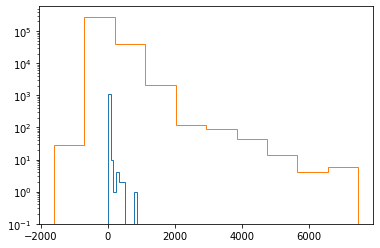

In [38]:
plt.hist(reals.base_GaussianFlux_instFlux_SN, histtype='step', density=False, log=True)
plt.hist(bogus.base_GaussianFlux_instFlux_SN, histtype='step', density=False, log=True)

In [39]:
len(reals)

1432

In [40]:
len(bogus)

634976

In [41]:
cols = [acol for acol in reals.columns if 'Shape' in acol]

In [42]:
len(cols)

86

/usr/common/software/python/3.7-anaconda-2019.10/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log10
  This is separate from the ipykernel package so we can avoid doing imports until
/global/homes/b/bos0109/.local/lib/python3.7/site-packages/numpy/core/function_base.py:159: RuntimeWarning: invalid value encountered in multiply
  y *= step


TypeError: hist() got multiple values for keyword argument 'log'

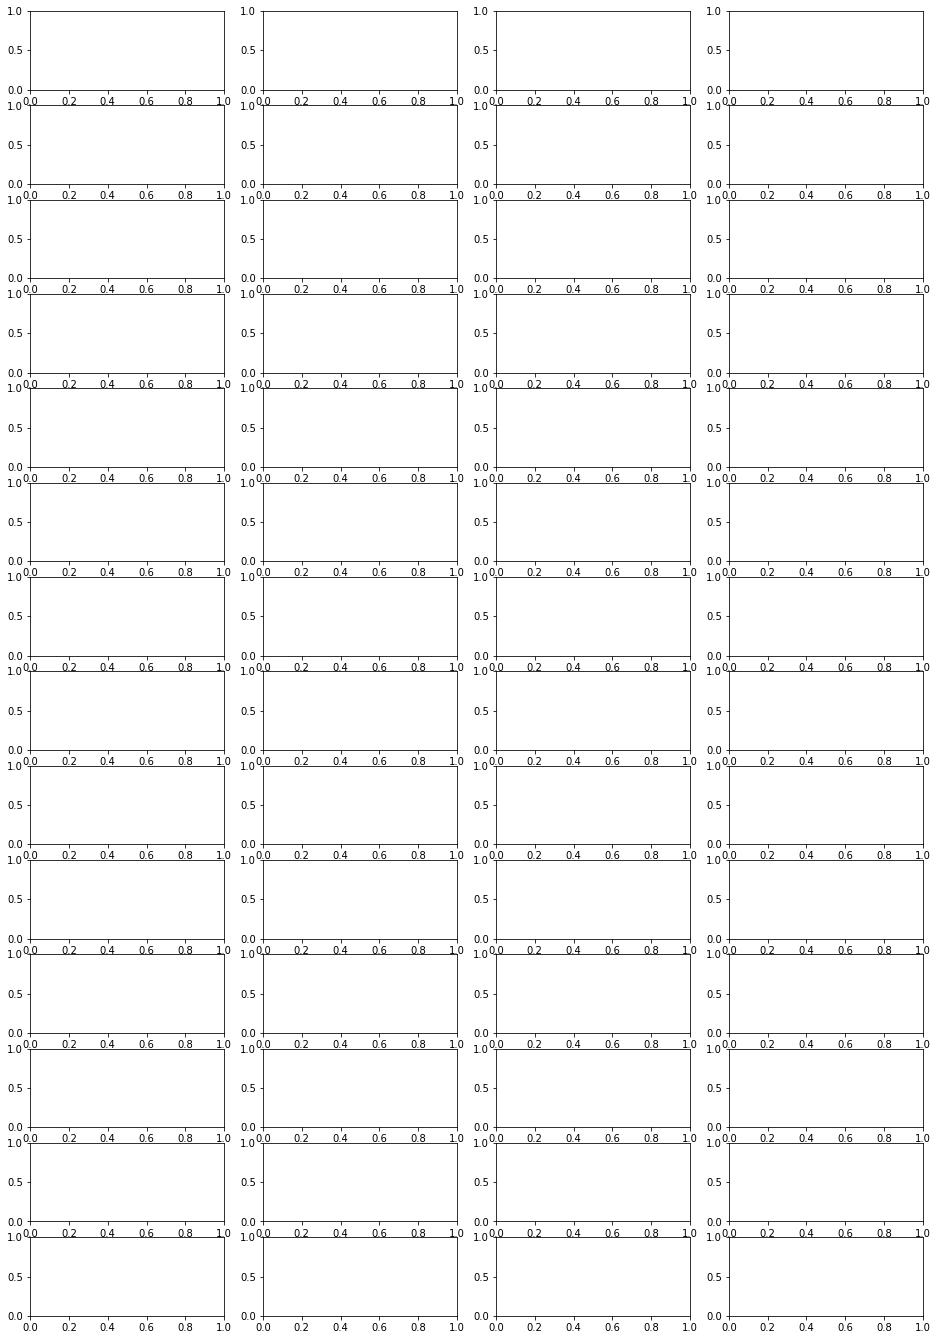

In [43]:
fig, axis = plt.subplots(ncols=4, nrows=14, figsize=(16, 24))
for acol, ax in zip(cols, axis.flatten()):
    bins=np.logspace(0, np.log10(np.max([np.max(reals[acol]), np.max(bogus[acol])])), num=20)
    binary_plot_hist(reals, bogus, acol, ax, log=True, #bins=bins,
                     logx=True, density=False, histtype='step', lw=1.5)
ax.legend(loc='best')
plt.tight_layout()

In [ ]:
plt.figure(figsize=(8,4))
plt.subplot(121)
plt.hist(np.sqrt(reals.slot_Shape_xx**2 + reals.slot_Shape_yy**2), log=True, color='red', histtype='stepfilled')
plt.subplot(122)
bins=np.logspace(0, 6.2, num=20)
plt.hist(np.sqrt(bogus.slot_Shape_xx**2 + bogus.slot_Shape_yy**2), log=True, color='black', histtype='step', lw=1.2, bins=bins)
plt.gca().set_xscale('log')
plt.tight_layout()

In [ ]:
plt.figure(figsize=(8,4))
plt.subplot(121)
plt.hist(np.sqrt(reals.base_SdssShape_xx**2 + reals.base_SdssShape_yy**2), log=True, color='red', histtype='stepfilled')
plt.subplot(122)
bins=np.logspace(0, 6.2, num=20)
plt.hist(np.sqrt(bogus.base_SdssShape_xx**2 + bogus.base_SdssShape_yy**2), log=True, color='black', histtype='step', lw=1.2, bins=bins)
plt.gca().set_xscale('log')
plt.tight_layout()

In [ ]:
plt.figure(figsize=(8,4))
plt.subplot(121)
plt.hist(np.sqrt(reals.slot_Shape_xx**2/reals.slot_Shape_yy**2), log=True, color='red', histtype='stepfilled')
plt.subplot(122)
#bins=np.logspace(0, 6.2, num=20)
plt.hist(np.sqrt(bogus.slot_Shape_xx**2/bogus.slot_Shape_yy**2), log=True, color='black', histtype='step', lw=1.2)#, bins=bins)
#plt.gca().set_xscale('log')
plt.tight_layout()

In [ ]:
plt.figure(figsize=(8,4))
plt.subplot(121)
plt.hist(np.sqrt(reals.base_SdssShape_xx**2/reals.base_SdssShape_yy**2), log=True, color='red', histtype='stepfilled')
plt.subplot(122)
#bins=np.logspace(0, 6.2, num=20)
plt.hist(np.sqrt(bogus.base_SdssShape_xx**2/bogus.base_SdssShape_yy**2), log=True, color='black', histtype='step', lw=1.2)#, bins=bins)
#plt.gca().set_xscale('log')
plt.tight_layout()

In [ ]:
plt.figure(figsize=(8,4))
plt.subplot(121)
plt.hist(reals.base_SdssShape_xy, log=True, color='red', histtype='stepfilled')
plt.subplot(122)
#bins=np.logspace(0, 6.2, num=20)
plt.hist(bogus.base_SdssShape_xy, log=True, color='black', histtype='step', lw=1.2)#, bins=bins)
#plt.gca().set_xscale('log')
plt.tight_layout()

In [ ]:
thresh = 100

In [ ]:
np.sum(bogus.slot_Shape_xx < thresh)

In [ ]:
np.sum(bogus.slot_Shape_xx < thresh)/len(bogus)

In [ ]:
np.sum(reals.slot_Shape_xx > thresh)

In [ ]:
np.sum(reals.slot_Shape_xx > thresh)/len(reals)